In [50]:
import numpy
import operator
from PIL import Image
import matplotlib.pyplot as plt

In [74]:
img = Image.open("/home/maximl/shared_scratch/vulcan_pbmc_debug/pbmc+PI_00009910.tiff")

In [75]:
im = []
for i in range(4):
    img.seek(i)
    im.append(numpy.array(img))
img = numpy.array(im)

In [76]:
img.shape

(4, 25, 104)

In [77]:
def croppadND(img, bounding):
    padding = tuple(map(lambda a,b: abs(min(0, b-a)), bounding, img.shape))
    if sum(padding) > 0:
        before_after = tuple(map(lambda a: (a//2, (a//2)+(a%2)), padding))
        img = numpy.pad(
            array=img,
            pad_width=before_after,
            mode='edge'
        )
        
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

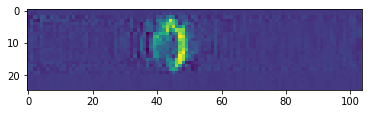

In [84]:
plt.imshow(img[3])

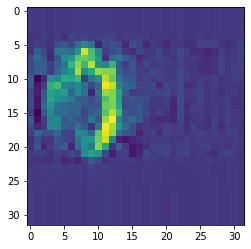

In [85]:
bounding = (4,32,32)
plt.imshow(cropND(img, (4,32,32))[3])